# 시그모이드 함수 그리기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

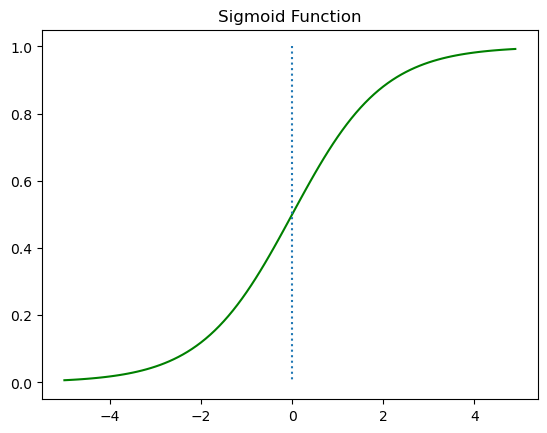

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()
# 양의 무한대로 입력되면 1에 유사한 값, 음의 무한대로 입력되면 0에 유사한 값
# 시그모이드 함수의 최적의 w(기울기)와 b(절편)깂을 구하는 것이 목적

- w의 값에 따라 경사도가 변한다 (선형회귀모형에서 w가 직선의 기울기를 의미하는 것과 동일)

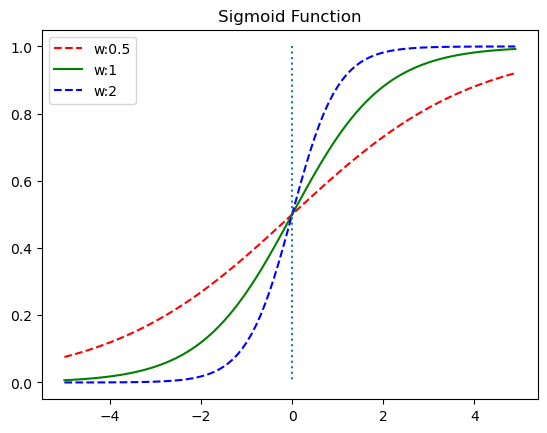

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5 * x)  # 0.5의 가중치 부여
y2 = sigmoid(x)
y3 = sigmoid(2 * x)

plt.plot(x, y1, 'r--', label='w:0.5')  # w의 값이 0.5일 때
plt.plot(x, y2, 'g', label='w:1')    # w의 값이 1일 때
plt.plot(x, y3, 'b--', label='w:2')  # w의 값이 2일 때
plt.plot([0,0], [1.0, 0.0], ':')
plt.legend()
plt.title('Sigmoid Function')
plt.show()

# 유방암 판별 예측

## 패키지 로딩

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

## 데이터 로드 및 확인

In [9]:
breast = load_breast_cancer()
#print(breast.DESCR)

df = pd.DataFrame(breast.data, columns=breast.feature_names)
df['target'] = breast.target
print(df.shape)
display(df.head())

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
print(df['target'].value_counts())  # 각 유니크값(1,0)의 데이터 수
df.isna().sum()
df.describe()

target
1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 종속변수/독립변수 선택

In [13]:
data_x = breast.data
data_y = breast.target

## 데이터 스케일링

In [14]:
scaled_data = StandardScaler().fit_transform(data_x)

## 학습 데이터와 평가 데이터 분리

In [15]:
x_train, x_test, y_train, y_test = train_test_split(scaled_data, data_y, test_size=0.3, random_state=0, stratify=data_y)
# 랜덤하게 학습/평가 데이터가 분리되어서 각 데이터에 종속변수가 고르지 않게 분포될 수 있어 왜곡된 데이터로 학습, 평가할 수 있음
# stratify=: 학습/평가데이터에 동일한 비율로 종속변수가 분포되도록 함

## 로지스틱 회귀 모델 생성
- 회귀계수 최적화 옵션
  - solver: 최적화 문제에 사용될 알고리즘 지정
    - 'lbfgs': 기본값, CPU 코어 수가 많다면 최적화를 병렬로 수행
    - 'liblinear': 작은 데이터에 적합한 알고리즘, 병렬 최적화 수행x
    - 'sag','saga': 확률적경사하강법을 기반으로 한 알고리즘으로 대용량 데이터에 적합, 모든데이터에 대해 손실함수를 계산하는 것이 아니라 데이터 중에서 임의의 몇 개의 데이터에 대해서만 확률적으로 손실함수 계산하여 경사하강법 적용
    - 'newton-cg', 'sag', 'saga', 'lbfgs'만 다항 손실을 처리함. 즉, 멀티클래스 분류 모델에 사용 가능
  - solver에 따른 규제 지원 사항
    - 'newton-cg', 'sag', 'lbfgs': L2 규제 적용
    - 'liblinear', 'saga': L2 규제 적용
  - multi_class: 다중클래스분류 문제의 상황에서 어떤 접근방식을 취할지 결정
    - 'ovr': one vs rest, 이진분류기인 sigmoid 함수 이용하여 결과 예측
    - 'multinomial': softmax 확률값으로 다중분류 수행, softmax-종속변수의 범주의 값이 3개 이상인 경우 각 범주가 선택될 확률분포의 값
  - C: 규제 강도(alpha)의 역수, C값이 작을수록 모델이 단순해짐(규제강도가 강해짐)
  - max_iter: solver가 결과를 수렴하는데 필요한 반복 횟수 (default:100), 지정된 반복횟수만큼 수행했음에도 에러메시지가 나올시 반복횟수를 키워야함

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)

print('추정계수(가중치):', model.coef_)  # 30개의 독립변수마다의 가중치, 가중치가 큰 값은 종속변수 결정에 영향이 큼, 양수면 양의관계, 음수면 음의 관계
print('절편:', model.intercept_)

추정계수(가중치): [[-0.54406091 -0.41605507 -0.51991133 -0.59308816  0.0027904   0.41939012
  -0.78884789 -1.02290774 -0.15221315  0.37699245 -1.07237296 -0.06165012
  -0.54319278 -0.69191037 -0.21537603  0.61125449  0.11034357 -0.26876198
   0.49779553  0.42281321 -0.97636344 -1.08977767 -0.82614726 -0.86970513
  -0.55575019 -0.15928048 -0.62816926 -0.7691139  -0.67505294 -0.73082045]]
절편: [0.23582794]


## 모델 예측

In [17]:
y_hat = model.predict(x_test)
print('정답:', y_test[:20])
print('예측:', y_hat[:20])

정답: [0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0]
예측: [0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0]


## Confusion Matrix
- 혼동행렬 함수는 행을 true, 열을 predict 값으로 이용
- 음성과 양성의 구분은 별도의 레이블을 지정하지 않으면 레이블 값의 정렬된 순서로 사용 (0:Negative, 1:Positive) 종속변수의 값을 오름차순으로 정렬 후 먼저 나온 값을 negative로, 다음값을 positive로 배치

<pre>
                 predict
            -----------------
                 N  |  P
            -----------------
            |N| TN  |  FP
        true|-|--------------
            |P| FN  |  TP
            -----------------
</pre>

In [18]:
matrix = confusion_matrix(y_test, y_hat) # (정답, 예측값)
print(matrix)

[[ 61   3]
 [  4 103]]


## 평가지표

In [21]:
# 정확도: 61+103 / 61+3+4+103
print(f'정확도: {accuracy_score(y_test, y_hat):.2f}')
# 정밀도: 103 / 3+103
print(f'정밀도: {precision_score(y_test, y_hat):.2f}')
# 재현율: 103 / 4+103
print(f'재현율: {recall_score(y_test, y_hat):.2f}')

정확도: 0.96
정밀도: 0.97
재현율: 0.96


In [33]:
pred_proba_positive = model.predict_proba(x_test)[:,1]  
# predict_proba: 각 데이터를 음성 / 양성으로 예측할 확률을 반환
# print(pred_proba_positive)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_positive)   
# roc_curve: 임계점 변화에 따른 거짓양성률과 참양성률의 변화, (정답값, 양성이라고 예측한 확률값)
roc_data = pd.DataFrame(np.concatenate([fpr.reshape(-1,1), tpr.reshape(-1,1), np.round(thresholds.reshape(-1,1), 3)], axis=1), columns=['FPR', 'TPR', 'THRESHOLDS'])
display(roc_data)
print(f'AUC: {roc_auc_score(y_test, pred_proba_positive)}')
# 임계점이 0.9로 높을 때, TPR은 높게 나오지만 FPR은 낮음
# fpr과 tpr의 차이가 클 때 좋은 모델

,FPR,TPR,THRESHOLDS
0,0.000000,0.000000,2.000
1,0.000000,0.009346,1.000
2,0.000000,0.897196,0.906
3,0.015625,0.897196,0.903
4,0.015625,0.915888,0.882
5,0.031250,0.915888,0.875
6,0.031250,0.953271,0.602
7,0.046875,0.953271,0.537
8,0.046875,0.971963,0.493
9,0.062500,0.971963,0.432


AUC: 0.9956191588785047


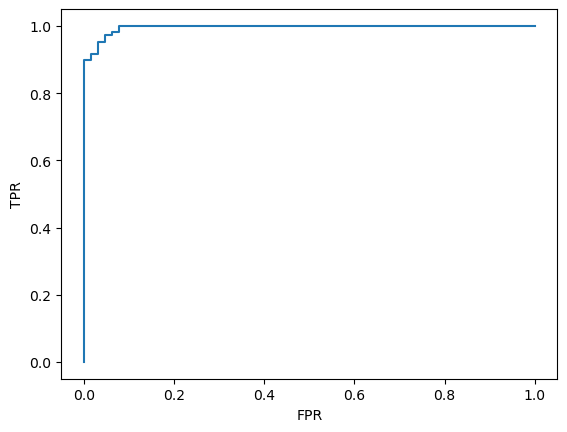

In [27]:
# roc 곡선
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## 임계값 변화에 따른 재현율과 정밀도 변화 확인

In [29]:
# 실제 양성을 양성이라고 판단한 비율(TPR)과 음성을 양성이라고 잘못 판단한 위양성율(FPR)의 차이가 가장 큰 경우의 임계치가 최적의 임계값
optimal_threshold = thresholds[np.argmax(tpr-fpr)]
print(f'최적의 임계값: {optimal_threshold:.3f}')

최적의 임계값: 0.493


In [31]:
from sklearn.metrics import classification_report

def threshold_filter(prob, threshold):
    return np.where(prob > threshold, 1, 0)  # 확률값이 임계치를 넘으면 1, 넘지 못하면 0

# 다양한 임계값에 따른 결과 확인
pred_1 = threshold_filter(pred_proba_positive, 0.5)
pred_2 = threshold_filter(pred_proba_positive, 0.7)
pred_3 = threshold_filter(pred_proba_positive, 0.3)

print(classification_report(y_test, pred_1))  # (정답값, 예측값)
print('='*60)
print(classification_report(y_test, pred_2))
print('='*60)
print(classification_report(y_test, pred_3))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        64
           1       0.97      0.96      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        64
           1       0.98      0.94      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        64
           1       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



## solver 별 성능평가 비교

In [34]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=600)
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    pred_proba_positive = model.predict_proba(x_test)[:,1]

    print(f'solver:{solver}, accuracy:{accuracy_score(y_test, y_hat):.3f}, AUC:{roc_auc_score(y_test, pred_proba_positive):.3f}')

solver:lbfgs, accuracy:0.959, AUC:0.996
solver:liblinear, accuracy:0.959, AUC:0.996
solver:newton-cg, accuracy:0.959, AUC:0.996
solver:sag, accuracy:0.959, AUC:0.996
solver:saga, accuracy:0.959, AUC:0.996


# [실습]

In [41]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [37]:
# 데이터 불러오기
df = pd.read_csv('./dataset/Personal_Loan.csv')
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

print(df.shape)
display(df.head())

(5000, 12)


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [39]:
df.isna().sum()
print(df['Personal Loan'].value_counts())

Personal Loan
0    4520
1     480
Name: count, dtype: int64


In [40]:
# 독립변수 / 종속변수 가져오기
data_x = df.drop('Personal Loan', axis=1)
data_y = df['Personal Loan']

data_x.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


In [42]:
# 데이터 스케일링
scaled_data = StandardScaler().fit_transform(data_x)

In [43]:
# 학습데이터/평가데이터 분리
x_train, x_test, y_train, y_test = train_test_split(scaled_data, data_y, test_size=0.2, random_state=0, stratify=data_y)

In [47]:
# 로지스틱 회귀모델 생성
model = LogisticRegression()
model.fit(x_train, y_train)

print(data_x.columns)
print('추정계수:', model.coef_)
print('절편:', model.intercept_)

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')
추정계수: [[-0.34839038  0.48473039  2.43829099  0.74526855  0.20045011  1.39470456
  -0.02168189 -0.25889374  0.86471768 -0.29379088 -0.48237772]]
절편: [-4.56325746]


In [51]:
# 모델 예측
y_hat = model.predict(x_test)
print('정답:', y_test.values[:20])
print('예측:', y_hat[:20])

정답: [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1]
예측: [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1]


In [52]:
matrix = confusion_matrix(y_test, y_hat)
print(matrix)

[[892  12]
 [ 36  60]]


In [53]:
# 평가지표
print(f'정확도: {accuracy_score(y_test, y_hat):.3f}')
print(f'정밀도: {precision_score(y_test, y_hat):.3f}')
print(f'재현율: {recall_score(y_test, y_hat):.3f}')

정확도: 0.952
정밀도: 0.833
재현율: 0.625


In [54]:
pred_proba_positive = model.predict_proba(x_test)[:,1]  
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_positive) 

roc_data = pd.DataFrame(np.concatenate([fpr.reshape(-1,1), tpr.reshape(-1,1), np.round(thresholds.reshape(-1,1), 3)], axis=1), columns=['FPR', 'TPR', 'THRESHOLDS'])

display(roc_data)
print(f'AUC: {roc_auc_score(y_test, pred_proba_positive)}')

,FPR,TPR,THRESHOLDS
0,0.000000,0.000000,1.999
1,0.000000,0.010417,0.999
2,0.000000,0.375000,0.881
3,0.001106,0.375000,0.849
4,0.001106,0.500000,0.717
...,...,...,...
73,0.591814,0.979167,0.003
74,0.591814,0.989583,0.003
75,0.869469,0.989583,0.001
76,0.869469,1.000000,0.001


AUC: 0.9630346607669616


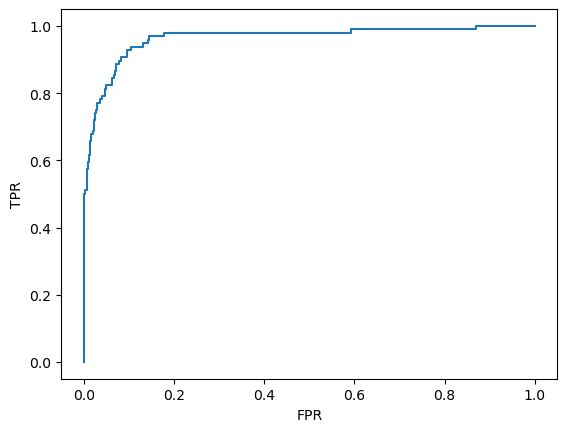

In [55]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [56]:
optimal_threshold = thresholds[np.argmax(tpr-fpr)]
print(f'최적의 임계값: {optimal_threshold:.3f}')

최적의 임계값: 0.094


In [57]:
from sklearn.metrics import classification_report

def threshold_filter(prob, threshold):
    return np.where(prob > threshold, 1, 0)
    
pred_1 = threshold_filter(pred_proba_positive, optimal_threshold)

print(classification_report(y_test, pred_1)) 

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       904
           1       0.48      0.93      0.64        96

    accuracy                           0.90      1000
   macro avg       0.74      0.91      0.79      1000
weighted avg       0.94      0.90      0.91      1000



In [61]:
from sklearn.model_selection import cross_val_score, cross_validate

score = cross_val_score(model, scaled_data, data_y)
print(score)
print('평균 정확도:', np.mean(score))

[0.951 0.946 0.954 0.946 0.955]
평균 정확도: 0.9503999999999999


In [62]:
result = cross_validate(model, scaled_data, data_y, cv=5, scoring=['accuracy', 'roc_auc_ovr'])

for key, val in result.items():
    print('평가지표:', key)
    print(f'평균값: {np.mean(val):.2f}')
    print('-'*30)

평가지표: fit_time
평균값: 0.01
------------------------------
평가지표: score_time
평균값: 0.00
------------------------------
평가지표: test_accuracy
평균값: 0.95
------------------------------
평가지표: test_roc_auc_ovr
평균값: 0.96
------------------------------


# [답안]

## 데이터 불러오기

In [72]:
df = pd.read_csv('./dataset/Personal_Loan.csv')

print(df.shape)
display(df.head())

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 데이터 전처리

In [73]:
df = df.drop(['ID', 'ZIP Code'], axis=1)
df 

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


## 독립변수/종속변수 분리

In [74]:
x = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']
print(y.value_counts())

Personal Loan
0    4520
1     480
Name: count, dtype: int64


## 학습 데이터/평가 데이터 분리

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [68]:
np.set_printoptions(precision=3)

## 모델 생성

In [76]:
model = LogisticRegression(max_iter=2000)
model.fit(x_train, y_train)

coef = model.coef_.squeeze(axis=0)  # squeeze: 2차원 -> 1차원 벡터로
print('추정계수:', coef)
# 회귀계수 해석
# 로지스틱 회귀계수에 지수변환(exp())을 적용하면 odds비가 나온다. 오즈비= 성공확률/실패확률 
odds_rate = np.exp(model.coef_).squeeze(axis=0)
coef_df = pd.DataFrame({'가중치':coef, 'odds비':odds_rate}, index=x.columns)

coef_df
# odds비가 크면 대출 승인 확률이 높음

추정계수: [-4.217e-02  5.128e-02  5.423e-02  6.457e-01  1.303e-01  1.715e+00
  6.811e-04 -8.207e-01  3.524e+00 -5.773e-01 -1.088e+00]


,가중치,odds비
Age,-0.042166,0.958710
Experience,0.051278,1.052615
Income,0.054229,1.055726
Family,0.645673,1.907270
CCAvg,0.130280,1.139147
Education,1.715313,5.558416
Mortgage,0.000681,1.000681
Securities Account,-0.820711,0.440119
CD Account,3.523522,33.903612
Online,-0.577272,0.561428


In [79]:
df['Education'].unique()

array([1, 2, 3], dtype=int64)

In [78]:
# 대출이 거부된 사람들의 교육 수준 평균
print(df[df['Personal Loan']==0]['Education'].mean()) 
# 대출이 승인된 사람들의 교육 수준 평균
print(df[df['Personal Loan']==1]['Education'].mean())

1.8435840707964601
2.2333333333333334


In [80]:
# 대출이 거부된 사람들의 소득 수준 평균
print(df[df['Personal Loan']==0]['Income'].mean()) 
# 대출이 승인된 사람들의 소득 수준 평균
print(df[df['Personal Loan']==1]['Income'].mean())

66.23738938053097
144.74583333333334


## 모델 예측 및 성능 측정

In [83]:
y_hat = model.predict(x_test)

cf = confusion_matrix(y_test, y_hat)
cf_df = pd.DataFrame(cf, index=[['actual','actual'],['대출불허(0)', '대출승인(1)']], columns=[['predict','predict'],['대출불허(0)','대출승인(1)']])
display(cf_df)

print(f'정확도: {accuracy_score(y_test, y_hat):.3f}')
print(f'정밀도: {precision_score(y_test, y_hat):.3f}')

predict        
               대출불허(0) 대출승인(1)
actual 대출불허(0)    1329      27
       대출승인(1)      51      93

정확도: 0.948
정밀도: 0.775


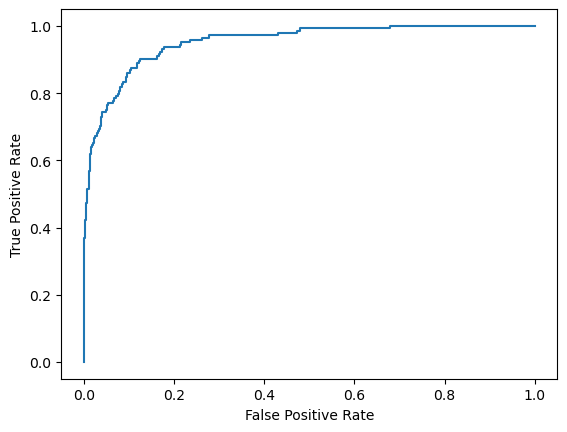

AUC:0.952


In [85]:
proba_posi = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, proba_posi)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')  # 위양성율
plt.ylabel('True Positive Rate')  # 참양성율
plt.show()

print(f'AUC:{roc_auc_score(y_test, proba_posi):.3f}')

## 교차검증

In [87]:
from sklearn.model_selection import cross_validate

scores = cross_validate(model, x, y, cv=10, scoring=['accuracy', 'precision', 'roc_auc'])
for key, val in scores.items():
    print('평가지표:', key)
    print(f'평균값:{np.mean(val):.3f}')
    print('-'*30)

평가지표: fit_time
평균값:0.393
------------------------------
평가지표: score_time
평균값:0.009
------------------------------
평가지표: test_accuracy
평균값:0.950
------------------------------
평가지표: test_precision
평균값:0.810
------------------------------
평가지표: test_roc_auc
평균값:0.958
------------------------------
